In [1]:
import pandas as pd
import re 
from pprint import pprint

# Gensim for topic modeling
import gensim
from gensim.utils import simple_preprocess
from gensim import matutils, models
import gensim.corpora as corpora
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# word by freq 
# wordcloud


/opt/homebrew/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [2]:
import pandas as pd
import numpy as np 
import re

# NLTK
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn

# spacy for lemmatization
import spacy
import scipy.sparse
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm")

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shawnteo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shawnteo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv('combined_hwz.csv', names=['Drop','ThreadName', 'ThreadLink', 'User','UserLink','Rank','Date','text']) 
df.head() #Filter by dates and then keep text?

df = df[["Date","text"]]

df["Year"] = df["Date"].str.split("-").str[2]

# drop 
# groupby year 
# LDA 
# bert 

In [4]:
# df2022 = df[df["Year"] == "22"][["Date","text"]]
# df2021 = df[df["Year"] == "21"][["Date","text"]]
# df2020 = df[df["Year"] == "20"][["Date","text"]]
# df2019 = df[df["Year"] == "19"][["Date","text"]]
# df2018 = df[df["Year"] == "18"][["Date","text"]]
# df2017 = df[df["Year"] == "17"][["Date","text"]]
# df2016 = df[df["Year"] == "16"][["Date","text"]]

# df2021.to_csv("2021.csv",index=False)
# df2020.to_csv("2020.csv",index=False)
# df2019.to_csv("2019.csv",index=False)
# df2018.to_csv("2018.csv",index=False)
# df2017.to_csv("2017.csv",index=False)
# df2016.to_csv("2016.csv",index=False)

df_assigned = df
df_assigned = df_assigned.reset_index(drop=True)


In [5]:
# Remove non-English words

# remove punc 
df_assigned['clean_text']  = df_assigned['text'].map(lambda x: re.sub("[^A-Za-z0-9]+"," ", str(x)))
# lower case
df_assigned['clean_text']  = df_assigned['clean_text'].apply(lambda x: x.lower())
# tokenize
df_assigned['clean_text']  = [word_tokenize(row) for row in df_assigned['clean_text']]
# remove stopwords
stop_words = stopwords.words('english')
new_stop_words = ['u','m','lol','condo','said','also']
stop_words.extend(new_stop_words)
def remove_stopwords(text):
    return [w for w in text if w not in stop_words]
df_assigned['clean_text']  = df_assigned['clean_text'].apply(lambda x: remove_stopwords(x))

df_assigned['join_clean_text']  = df_assigned['clean_text'].apply(lambda x: " ".join(x))
df_assigned


,Date,text,Year,clean_text,join_clean_text
0,26-Nov-20,Looking to replace 3x aircons for our HDB flat...,20,"[looking, replace, 3x, aircons, hdb, flat, nor...",looking replace 3x aircons hdb flat normal hdb...
1,26-Nov-20,"Something just occured to me, do you think tha...",20,"[something, occured, think, need, pay, extra, ...",something occured think need pay extra special...
2,26-Nov-20,A freehold semi-detached house at 61 Jalan Kel...,20,"[freehold, semi, detached, house, 61, jalan, k...",freehold semi detached house 61 jalan kelawar ...
3,24-Nov-20,Need some advice here from the property gurus ...,20,"[need, advice, property, gurus, currently, hol...",need advice property gurus currently hold resa...
4,24-Nov-20,Any grants taken will go back to the CPF accou...,20,"[grants, taken, go, back, cpf, account, never,...",grants taken go back cpf account never back hd...
...,...,...,...,...,...
315552,26-Nov-20,"call me a stereotype, if possible i will not l...",20,"[call, stereotype, possible, live, near, renta...",call stereotype possible live near rental flat...
315553,26-Nov-20,Rental flat got many problem one. I will not s...,20,"[rental, flat, got, many, problem, one, select...",rental flat got many problem one select bto to...
315554,26-Nov-20,the estate across the road to mine has rental....,20,"[estate, across, road, mine, rental, basically...",estate across road mine rental basically rubbi...
315555,26-Nov-20,halfnode said:\nthe estate across the road to ...,20,"[halfnode, estate, across, road, mine, rental,...",halfnode estate across road mine rental basica...


In [6]:
df_assigned = df_assigned[df_assigned['join_clean_text'].str.contains("hawker|mrt|clinic|school|hospital|mall|market|express")]


In [7]:
new_tokens = []
for i in df_assigned["clean_text"].tolist():
    new_tokens+= i
print(new_tokens[1:100])

['semi', 'detached', 'house', '61', 'jalan', 'kelawar', 'market', '7', '84', 'million', 'knight', 'frank', 'singapore', 'appointed', 'estate', 'sole', 'marketing', 'agent', 'sale', 'two', 'storey', 'house', 'sits', 'plot', '3', '100', 'sq', 'ft', 'nine', 'metre', 'frontage', 'jalan', 'kelawar', 'asking', 'price', 'translates', 'land', 'rate', '2', '500', 'psf', 'https', 'www', 'edgeprop', 'sg', 'property', 'ne', 'arezone', 'utm', 'medium', 'utm', 'campaign', 'forumposting', 'mine', '20', 'years', 'resale', 'flat', 'top', '1999', 'got', 'bomb', 'shelter', 'aircon', 'ledge', 'noise', 'external', 'traffic', 'supermarket', 'loading', 'bay', 'crazyclubx', 'last', 'time', 'rent', 'unfortunately', 'bought', 'punggol', 'house', 'thought', 'home', 'haiz', 'end', 'peace', 'knew', 'rather', 'rent', 'forever', 'least', 'change', 'buy', 'wait', '5', 'years', 'sell', 'move', 'slamming', 'doors', 'clearly']


In [8]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#load in the NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects 
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('omw-1.4')


lemmatizer = WordNetLemmatizer()
new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
#counts the words, pairs and trigrams
counted = Counter(new_tokens)
counted_2= Counter(ngrams(new_tokens,2))
counted_3= Counter(ngrams(new_tokens,3))
#creates 3 data frames and returns thems
word_freq = pd.DataFrame(counted.items(),columns=["word","frequency"]).sort_values(by="frequency",ascending=False)
word_pairs =pd.DataFrame(counted_2.items(),columns=["pairs","frequency"]).sort_values(by="frequency",ascending=False)
# trigrams =pd.DataFrame(counted_3.items(),columns=[‘trigrams’,’frequency’]).sort_values(by=’frequency’,ascending=False)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shawnteo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shawnteo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<AxesSubplot:xlabel='frequency', ylabel='pairs'>

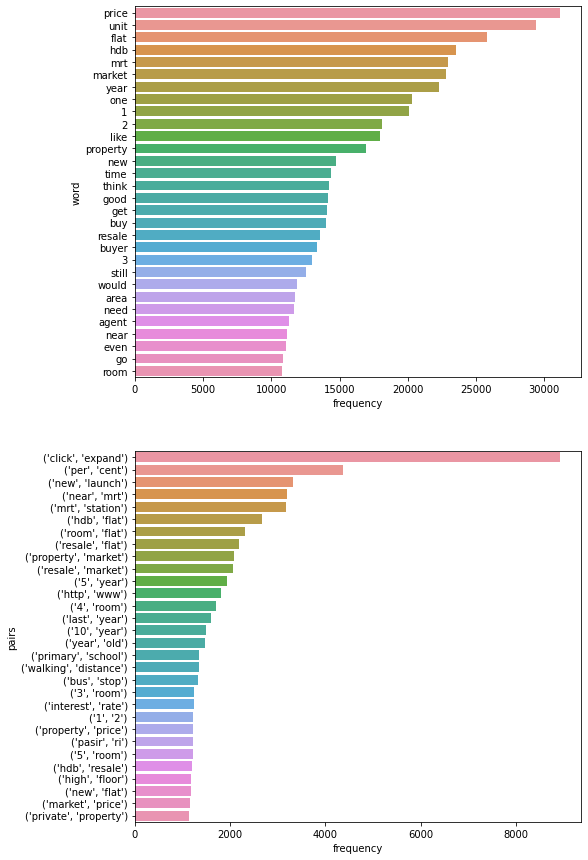

In [9]:
word_freq
fig, axes = plt.subplots(2,1,figsize=(8,15))
sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freq.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=word_pairs.head(30))

In [10]:
# # lemmatization & noun extraction 

# def lemmatization(text, allowed_postags=['NOUN']): 
#     doc = nlp(' '.join(text)) 
#     text_out = [token.lemma_ for token in doc if token.pos_ in allowed_postags]
#     return text_out

# df_assigned['lem'] = df_assigned['clean_text'].apply(lambda x: lemmatization(x))


# df_assigned.head()

In [16]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed texts together
# description_str = ''
# for word_list in df_assigned['clean_text'].values:
#     description_str += ' '.join(row for row in word_list) + ' '

description_str = " ".join(new_tokens)


new_stop_words = stopwords.words('english')
# new_stop_words += ['recipe','time', 'dish']

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, stopwords = new_stop_words,
                      contour_color='steelblue', collocations = False,  random_state=1,width=1200, height=800)

# Generate a word cloud
wordcloud.generate(description_str)

# Visualize the word cloud
wordcloud.to_file("test.png")